# Consumer Email Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\MY PC\Desktop\email_data.xlsx')
df.head()

,Midascontactid,Createdat,Emailpermissionstatus,Cont.Acq.Src,Email.Src.First,Segment,Segmentsecondary,Email.Acq.Dt,Email.Pref.Ch.Dt,Entry.Point.List,...,Eml.Click.First.Ts,Eml.Click.Last.Ts,Eml.Bounce.Last.Ts,Eml.Unsub.Last.Ts,Eml.Spam.Last.Ts,Email.Domain,Em.Pref.Status,Em.Pref.Dte,Invalid.Email.Dte,Em.Spamclplt.Dte
0,1020375449,2019-04-23,I,LIDUAS16,OOBWIN15,CON,NaN,2019-04-22,2019-08-24,|LIDUAS1608|OOBAND1407|OOBWIN1506|,...,2019-08-21,2019-08-21,NaT,NaT,NaT,gmail.com,I,2019-08-24,NaT,NaN
1,1042778096,2019-10-16,U,OOBWIN15,NaN,CON,NaN,NaT,2019-10-15,|OOBWIN1506|,...,NaT,NaT,NaT,NaT,NaT,hotmail.com,U,2019-10-15,NaT,NaN
2,1039527195,2019-07-29,I,NETMINNG,NETMINNG,CON,NaN,2019-07-29,2019-07-30,|HYBRIS1506|IGNONE20121024|SAPCRMSHIP120501|,...,NaT,NaT,NaT,NaT,NaT,hotmail.com,I,2019-07-30,NaT,NaN
3,1008356168,2019-11-29,I,EPI2,EPI2,CON,NaN,2015-11-04,2019-11-29,|HYBRIS1506|LENI2|OOBWIN1407|OOBWIN1506|RI6 PE...,...,2016-07-28,2016-08-06,NaT,2016-11-03,NaT,gmail.com,I,2019-11-29,NaT,NaN
4,1038164470,2019-04-30,U,OOBWIN15,NaN,CON,NaN,NaT,2019-04-29,|OOBWIN1506|,...,2019-05-26,2019-05-26,NaT,NaT,NaT,hotmail.com,U,2019-04-29,NaT,NaN


In [3]:
df.shape

(10000, 51)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Midascontactid               10000 non-null  int64         
 1   Createdat                    10000 non-null  datetime64[ns]
 2   Emailpermissionstatus        10000 non-null  object        
 3   Cont.Acq.Src                 9943 non-null   object        
 4   Email.Src.First              6274 non-null   object        
 5   Segment                      10000 non-null  object        
 6   Segmentsecondary             87 non-null     object        
 7   Email.Acq.Dt                 6274 non-null   datetime64[ns]
 8   Email.Pref.Ch.Dt             9943 non-null   datetime64[ns]
 9   Entry.Point.List             9943 non-null   object        
 10  Cont.Acq.Src2                9943 non-null   object        
 11  Cont.Acq.Dte                 9943 non-null

## MISSING VALUE CHECK

In [5]:
df.isnull().sum()

Midascontactid                     0
Createdat                          0
Emailpermissionstatus              0
Cont.Acq.Src                      57
Email.Src.First                 3726
Segment                            0
Segmentsecondary                9913
Email.Acq.Dt                    3726
Email.Pref.Ch.Dt                  57
Entry.Point.List                  57
Cont.Acq.Src2                     57
Cont.Acq.Dte                      57
Prod.Buy.Last                   1520
Prod.Buy.First                  1520
Prod.Buy.Accessories            9962
Prod.Buy.All.In.One.Desktop     9740
Prod.Buy.Desktop                9590
Prod.Buy.Idc                    9477
Prod.Buy.Idpd                   5401
Prod.Buy.Laptop                 9914
Prod.Buy.Servers                9999
Prod.Buy.Software              10000
Prod.Buy.Thnkc                  9914
Prod.Buy.Thnkp                  9136
Prod.Buy.Warranties             9749
Prod.Buy.Workstation            9999
Prod.Buy.Android.Tablet         9998
P

#### As we can see a number of columns have missing values which are more than 50% of the total number of instances. Thus those columns doesn't provide us enough relevance for the analysis and also there are additional columns which are not required for the analysis. Hence we would drop them. 

In [6]:
df.columns

Index(['Midascontactid', 'Createdat', 'Emailpermissionstatus', 'Cont.Acq.Src',
       'Email.Src.First', 'Segment', 'Segmentsecondary', 'Email.Acq.Dt',
       'Email.Pref.Ch.Dt', 'Entry.Point.List', 'Cont.Acq.Src2', 'Cont.Acq.Dte',
       'Prod.Buy.Last', 'Prod.Buy.First', 'Prod.Buy.Accessories',
       'Prod.Buy.All.In.One.Desktop', 'Prod.Buy.Desktop', 'Prod.Buy.Idc',
       'Prod.Buy.Idpd', 'Prod.Buy.Laptop', 'Prod.Buy.Servers',
       'Prod.Buy.Software', 'Prod.Buy.Thnkc', 'Prod.Buy.Thnkp',
       'Prod.Buy.Warranties', 'Prod.Buy.Workstation',
       'Prod.Buy.Android.Tablet', 'Prod.Buy.Windows.Tablet',
       'Prod.Buy.Convertible', 'Prod.Buy.Android.Os', 'Prod.Buy.Gaming',
       'Prod.Buy.Windows.Os', 'Prod.Buy.Gaming.Related', 'Country',
       'Eml.Sent.Num', 'Eml.Sent.First.Ts', 'Eml.Sent.Last.Ts', 'Eml.Open.Num',
       'Eml.Open.First.Ts', 'Eml.Open.Last.Ts', 'Eml.Click.Num',
       'Eml.Click.First.Ts', 'Eml.Click.Last.Ts', 'Eml.Bounce.Last.Ts',
       'Eml.Unsub.Last.Ts', 

In [7]:
df_new = df.drop(['Createdat','Segmentsecondary','Prod.Buy.Accessories',
       'Prod.Buy.All.In.One.Desktop', 'Prod.Buy.Desktop', 'Prod.Buy.Idc',
       'Prod.Buy.Idpd', 'Prod.Buy.Laptop', 'Prod.Buy.Servers',
       'Prod.Buy.Software', 'Prod.Buy.Thnkc', 'Prod.Buy.Thnkp',
       'Prod.Buy.Warranties', 'Prod.Buy.Workstation',
       'Prod.Buy.Android.Tablet', 'Prod.Buy.Windows.Tablet',
       'Prod.Buy.Convertible', 'Prod.Buy.Android.Os', 'Prod.Buy.Gaming',
       'Prod.Buy.Windows.Os', 'Prod.Buy.Gaming.Related','Eml.Open.First.Ts','Email.Pref.Ch.Dt','Eml.Open.Last.Ts',
       'Eml.Click.First.Ts', 'Eml.Click.Last.Ts', 'Eml.Bounce.Last.Ts','Eml.Unsub.Last.Ts','Eml.Spam.Last.Ts','Invalid.Email.Dte',
       'Em.Spamclplt.Dte','Em.Pref.Status', 'Em.Pref.Dte','Entry.Point.List', 'Cont.Acq.Src2','Eml.Click.Num','Em.Pref.Status', 'Em.Pref.Dte'],axis = 1)

In [8]:
df_new.head()

,Midascontactid,Emailpermissionstatus,Cont.Acq.Src,Email.Src.First,Segment,Email.Acq.Dt,Cont.Acq.Dte,Prod.Buy.Last,Prod.Buy.First,Country,Eml.Sent.Num,Eml.Sent.First.Ts,Eml.Sent.Last.Ts,Eml.Open.Num,Email.Domain
0,1020375449,I,LIDUAS16,OOBWIN15,CON,2019-04-22,2017-03-03,2019-08-24,2019-04-22,US,228.0,2017-03-03,2020-02-20,41.0,gmail.com
1,1042778096,U,OOBWIN15,NaN,CON,NaT,2019-10-15,2019-10-15,2019-10-15,US,2.0,2019-11-25,2019-12-24,0.0,hotmail.com
2,1039527195,I,NETMINNG,NETMINNG,CON,2019-07-29,2019-07-29,2019-07-30,2019-07-30,US,121.0,2019-07-29,2020-02-20,4.0,hotmail.com
3,1008356168,I,EPI2,EPI2,CON,2015-11-04,2015-11-04,2019-11-29,2016-07-26,US,15.0,2019-11-29,2020-01-13,2.0,gmail.com
4,1038164470,U,OOBWIN15,NaN,CON,NaT,2019-04-29,2019-04-29,2019-04-29,US,20.0,2019-04-30,2019-05-24,1.0,hotmail.com


In [9]:
df_new.shape

(10000, 15)

In [10]:
df_new.isnull().sum()

Midascontactid              0
Emailpermissionstatus       0
Cont.Acq.Src               57
Email.Src.First          3726
Segment                     0
Email.Acq.Dt             3726
Cont.Acq.Dte               57
Prod.Buy.Last            1520
Prod.Buy.First           1520
Country                     0
Eml.Sent.Num              141
Eml.Sent.First.Ts        2121
Eml.Sent.Last.Ts         2121
Eml.Open.Num              141
Email.Domain                0
dtype: int64

## MISSING VALUE TREATMENT

In [11]:
df_new1 = df_new.dropna(how="any",axis=0)

In [12]:
df_new1.shape

(4607, 15)

In [13]:
df_new1.isnull().sum()

Midascontactid           0
Emailpermissionstatus    0
Cont.Acq.Src             0
Email.Src.First          0
Segment                  0
Email.Acq.Dt             0
Cont.Acq.Dte             0
Prod.Buy.Last            0
Prod.Buy.First           0
Country                  0
Eml.Sent.Num             0
Eml.Sent.First.Ts        0
Eml.Sent.Last.Ts         0
Eml.Open.Num             0
Email.Domain             0
dtype: int64

# Exploratory Data Analysis

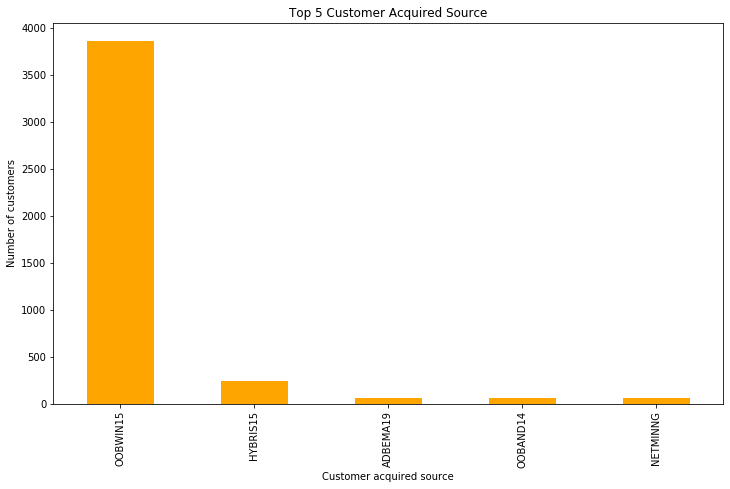

In [14]:
df_new1["Cont.Acq.Src"].value_counts()[:5].plot(kind='bar' , figsize=(12, 7) , color = 'orange')
plt.xlabel("Customer acquired source")
plt.ylabel("Number of customers")
plt.title("Top 5 Customer Acquired Source")
plt.show()

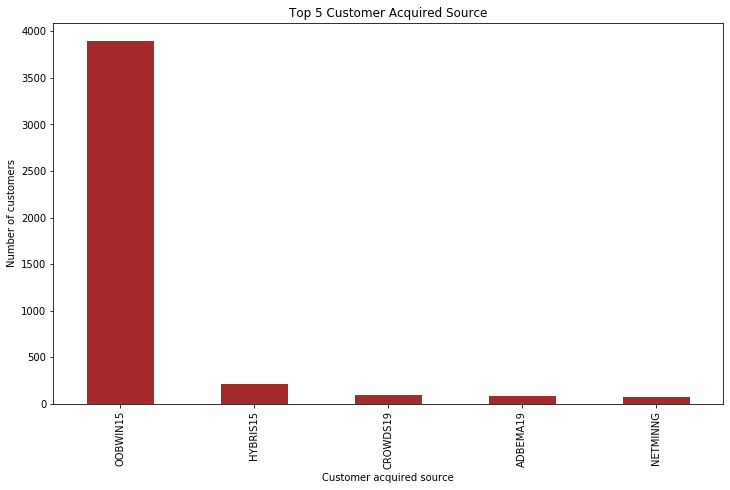

In [15]:
df_new1["Email.Src.First"].value_counts()[:5].plot(kind='bar' ,figsize=(12, 7) , color = 'brown')
plt.xlabel("Customer acquired source")
plt.ylabel("Number of customers")
plt.title("Top 5 Customer Acquired Source")
plt.show()

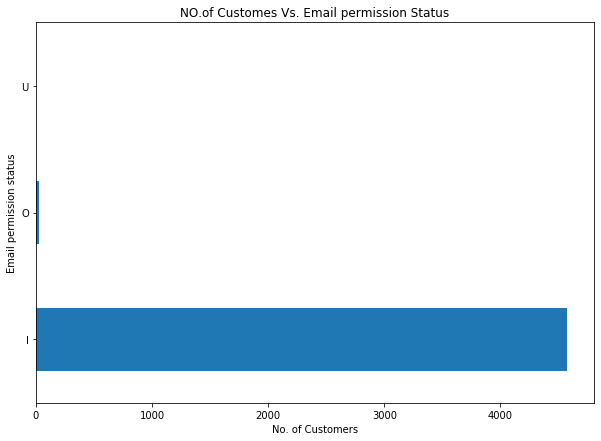

In [16]:
df_new1["Emailpermissionstatus"].value_counts().plot(kind="barh",figsize=(10,7))
plt.xlabel("No. of Customers")
plt.ylabel("Email permission status")
plt.title("NO.of Customes Vs. Email permission Status")
plt.show()

In [17]:
df_new1["Country"].value_counts()

US    4493
CA     113
us       1
Name: Country, dtype: int64

In [18]:
df_new1["Country"] = df_new1["Country"].replace("us" , "US")

In [19]:
percentage_us = (df_new1["Country"].value_counts()[0]/df_new1["Country"].count())*100
percentage_ca = (df_new1["Country"].value_counts()[1]/df_new1["Country"].count())*100
data = [percentage_us,percentage_ca]
label = ["US" , "CA"]

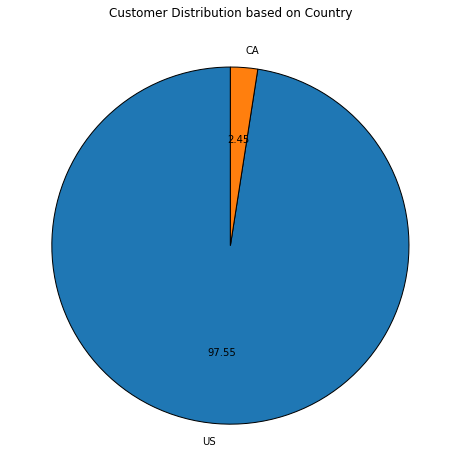

In [20]:
fig = plt.figure(figsize =(8, 10))
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
plt.pie(data, labels = label,wedgeprops = wp,autopct='%1.2f',startangle=90)
plt.title("Customer Distribution based on Country")
plt.show()

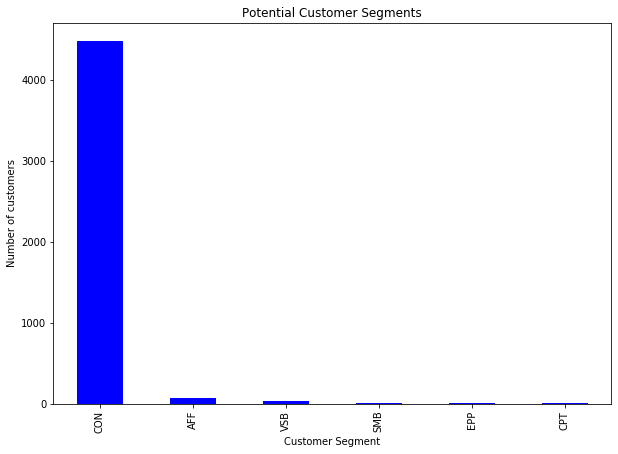

In [21]:
df_new1['Segment'].value_counts().plot(kind = "bar" , figsize = (10,7) , color = 'blue')
plt.xlabel("Customer Segment")
plt.ylabel("Number of customers")
plt.title("Potential Customer Segments")
plt.show()

In [22]:
df_new1["Email.Domain"].value_counts()[:5]

gmail.com      2375
yahoo.com       495
outlook.com     438
hotmail.com     415
aol.com         124
Name: Email.Domain, dtype: int64

In [23]:
percentage_gmail = (df_new1["Email.Domain"].value_counts()[0]/df_new1["Email.Domain"].count())*100
percentage_yahoo = (df_new1["Email.Domain"].value_counts()[1]/df_new1["Email.Domain"].count())*100
percentage_outlook = (df_new1["Email.Domain"].value_counts()[2]/df_new1["Email.Domain"].count())*100
percentage_hotmail = (df_new1["Email.Domain"].value_counts()[3]/df_new1["Email.Domain"].count())*100
percentage_aol = (df_new1["Email.Domain"].value_counts()[4]/df_new1["Email.Domain"].count())*100
data = [percentage_gmail,percentage_yahoo,percentage_outlook,percentage_hotmail,percentage_aol]
label = ["Gmail" , "Yahoo", "Outlook" , "Hotmail" , "Aol"]

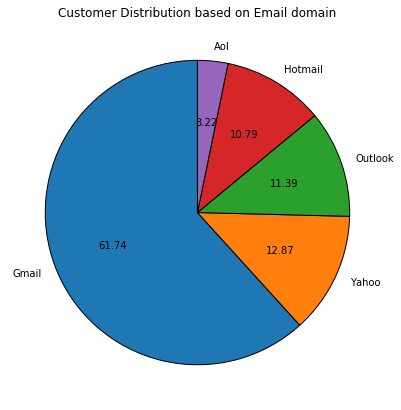

In [24]:
fig = plt.figure(figsize =(10, 7))
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
plt.pie(data, labels = label,wedgeprops = wp,autopct='%1.2f',startangle=90)
plt.title("Customer Distribution based on Email domain")
plt.show()

In [25]:
df_new1["email_view_rate"] = (df_new1["Eml.Open.Num"]/df_new1["Eml.Sent.Num"]) * 100

In [26]:
response_rate_data = df_new1.groupby(["Country" , "Segment"]).email_view_rate.mean().reset_index()
response_rate_data

,Country,Segment,email_view_rate
0,CA,AFF,38.845342
1,CA,CON,31.711024
2,CA,EPP,66.666667
3,CA,VSB,39.015793
4,US,AFF,50.344836
5,US,CON,18.545449
6,US,CPT,84.929945
7,US,EPP,293.333333
8,US,SMB,28.564566
9,US,VSB,58.366993


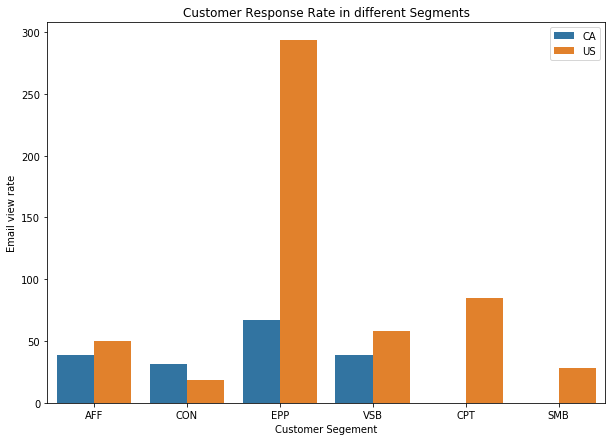

In [27]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'Segment' , y = 'email_view_rate' , data= response_rate_data , hue = 'Country')
plt.legend(loc =1)
plt.xlabel("Customer Segement")
plt.ylabel("Email view rate")
plt.title("Customer Response Rate in different Segments")
plt.show()

## Analyzed Results(Insights)

1) The top customer acquired source independent of email permission status is OOBWIN15.

2) The top customer acquired source after receiving email permission from customer is  also OOBWIN15.

3) Other top sources are HYBRIS15, NETMINNG and ADBEMA19 in both the above mentioned cases.

4) The customers are high in numbers when email permission status is “Opted-in” but considerably low for “”Opted-out”.

5) US-based customers are high in numbers.

6) Customers using G-mail are high in numbers followed by Yahoo and Outlook.

7) Customer’s response rate to open the emails sent to them is high for EPP segment in both the countries followed by CPT segment is US and VSB segment in CA.

## Data Pre-processing

In [28]:
df_new1.head()

,Midascontactid,Emailpermissionstatus,Cont.Acq.Src,Email.Src.First,Segment,Email.Acq.Dt,Cont.Acq.Dte,Prod.Buy.Last,Prod.Buy.First,Country,Eml.Sent.Num,Eml.Sent.First.Ts,Eml.Sent.Last.Ts,Eml.Open.Num,Email.Domain,email_view_rate
0,1020375449,I,LIDUAS16,OOBWIN15,CON,2019-04-22,2017-03-03,2019-08-24,2019-04-22,US,228.0,2017-03-03,2020-02-20,41.0,gmail.com,17.982456
2,1039527195,I,NETMINNG,NETMINNG,CON,2019-07-29,2019-07-29,2019-07-30,2019-07-30,US,121.0,2019-07-29,2020-02-20,4.0,hotmail.com,3.305785
3,1008356168,I,EPI2,EPI2,CON,2015-11-04,2015-11-04,2019-11-29,2016-07-26,US,15.0,2019-11-29,2020-01-13,2.0,gmail.com,13.333333
6,1044033221,I,CROWDS19,CROWDS19,CON,2019-12-04,2019-12-04,2019-12-07,2019-12-05,US,34.0,2019-12-07,2020-02-06,9.0,danmarkcom.com,26.470588
8,1042888581,I,OOBWIN15,OOBWIN15,CON,2019-10-20,2019-10-20,2019-10-20,2019-10-20,US,34.0,2019-10-20,2020-01-21,0.0,gmail.com,0.000000


In [29]:
df_clustering = df_new1.drop(["Midascontactid" , "Email.Acq.Dt" , "Cont.Acq.Dte" , "Prod.Buy.Last" , "Prod.Buy.First",
                              "Eml.Sent.First.Ts" , "Eml.Sent.Last.Ts","Country","Emailpermissionstatus","Segment"] , axis = 1)

In [30]:
num_columns = list(df_clustering._get_numeric_data().columns)
all_columns = list(df_clustering.columns)

cat_columns = []
for i in all_columns:
    if i not in num_columns:
        cat_columns.append(i)
cat_columns

['Cont.Acq.Src', 'Email.Src.First', 'Email.Domain']

In [31]:
df_cat = df_clustering[cat_columns]
df_num = df_clustering[num_columns]

In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [33]:
df_cat_encoded = df_cat.apply(lb.fit_transform)
df_clustering1 = df_cat_encoded.join(df_num)
df_clustering1.head()

,Cont.Acq.Src,Email.Src.First,Email.Domain,Eml.Sent.Num,Eml.Open.Num,email_view_rate
0,30,34,138,228.0,41.0,17.982456
2,33,29,157,121.0,4.0,3.305785
3,10,10,138,15.0,2.0,13.333333
6,4,5,96,34.0,9.0,26.470588
8,39,34,138,34.0,0.0,0.000000


In [34]:
df_clustering1 = df_clustering1.reset_index()
df_clustering1.head()

,index,Cont.Acq.Src,Email.Src.First,Email.Domain,Eml.Sent.Num,Eml.Open.Num,email_view_rate
0,0,30,34,138,228.0,41.0,17.982456
1,2,33,29,157,121.0,4.0,3.305785
2,3,10,10,138,15.0,2.0,13.333333
3,6,4,5,96,34.0,9.0,26.470588
4,8,39,34,138,34.0,0.0,0.000000


In [35]:
df_clustering1 = df_clustering1.drop("index",axis=1)
df_clustering1.head()

,Cont.Acq.Src,Email.Src.First,Email.Domain,Eml.Sent.Num,Eml.Open.Num,email_view_rate
0,30,34,138,228.0,41.0,17.982456
1,33,29,157,121.0,4.0,3.305785
2,10,10,138,15.0,2.0,13.333333
3,4,5,96,34.0,9.0,26.470588
4,39,34,138,34.0,0.0,0.000000


In [36]:
df_clustering_first = df_clustering1[["Cont.Acq.Src" , "Email.Src.First" , "Email.Domain"]]
df_clustering_first.head()

,Cont.Acq.Src,Email.Src.First,Email.Domain
0,30,34,138
1,33,29,157
2,10,10,138
3,4,5,96
4,39,34,138


In [37]:
df_clustering_second = df_clustering1[["Eml.Sent.Num" , "Eml.Open.Num" , "email_view_rate"]]
df_clustering_second.head()

,Eml.Sent.Num,Eml.Open.Num,email_view_rate
0,228.0,41.0,17.982456
1,121.0,4.0,3.305785
2,15.0,2.0,13.333333
3,34.0,9.0,26.470588
4,34.0,0.0,0.000000


## Elbow Plot

In [38]:
from sklearn.cluster import KMeans

### For first table

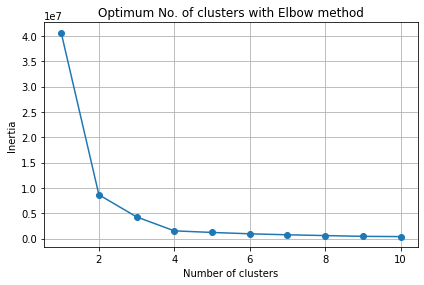

In [39]:
inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i, 
                random_state = 0)
    km.fit(df_clustering_first)
    inertia.append(km.inertia_)
plt.plot(range(1, 11), inertia , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.title("Optimum No. of clusters with Elbow method")
plt.grid()
plt.show()

#### As elbow plot bends at 2, so the optimum number of clusters and k-value would be taken as 2

### For second table

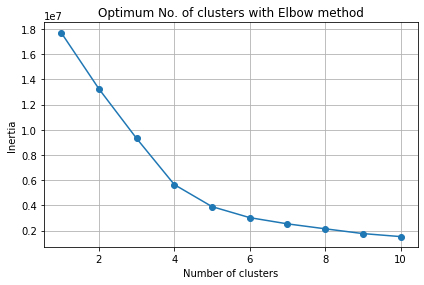

In [40]:
inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i, 
                random_state = 0)
    km.fit(df_clustering_second)
    inertia.append(km.inertia_)
plt.plot(range(1, 11), inertia , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.title("Optimum No. of clusters with Elbow method")
plt.grid()
plt.show()

#### As elbow plot bends at 2, so the optimum number of clusters and k-value would be taken as 2

## Clustering Analysis

### For first clustering table:

In [41]:
km = KMeans(n_clusters = 2 , random_state = 42)
km.fit(df_clustering_first)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [42]:
pd.DataFrame(km.cluster_centers_)

,0,1,2
0,35.904984,31.223841,134.829496
1,36.785714,32.001701,326.031463


In [43]:
df_clustering_first["Cluster_labels"] = km.labels_
df_clustering_first.head()

,Cont.Acq.Src,Email.Src.First,Email.Domain,Cluster_labels
0,30,34,138,0
1,33,29,157,0
2,10,10,138,0
3,4,5,96,0
4,39,34,138,0


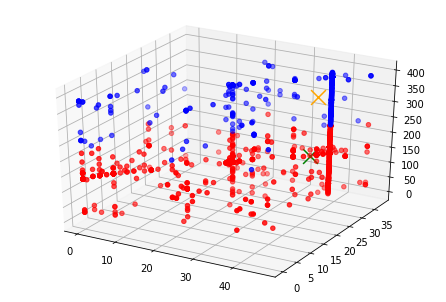

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=Axes3D(fig)

ax.scatter(df_clustering_first[df_clustering_first['Cluster_labels']==0]["Cont.Acq.Src"],
           df_clustering_first[df_clustering_first['Cluster_labels']==0]["Email.Src.First"],
           df_clustering_first[df_clustering_first['Cluster_labels']==0]["Email.Domain"],
           color='red')

ax.scatter(df_clustering_first[df_clustering_first['Cluster_labels']==1]["Cont.Acq.Src"],
           df_clustering_first[df_clustering_first['Cluster_labels']==1]["Email.Src.First"],
           df_clustering_first[df_clustering_first['Cluster_labels']==1]["Email.Domain"],
           color='blue')

ax.scatter(km.cluster_centers_[0,0],km.cluster_centers_[0,1],km.cluster_centers_[0,2],color='green',marker='x',s=220)
ax.scatter(km.cluster_centers_[1,0],km.cluster_centers_[1,1],km.cluster_centers_[1,2],color='orange',marker='x',s=220)

plt.show()

### For second clustering table

In [45]:
km = KMeans(n_clusters = 2 , random_state = 42)
km.fit(df_clustering_second)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [46]:
pd.DataFrame(km.cluster_centers_)

,0,1,2
0,12.660906,2.028958,18.103772
1,127.227692,33.855385,43.303213


In [47]:
df_clustering_second["Cluster_labels"] = km.labels_
df_clustering_second.head()

,Eml.Sent.Num,Eml.Open.Num,email_view_rate,Cluster_labels
0,228.0,41.0,17.982456,1
1,121.0,4.0,3.305785,1
2,15.0,2.0,13.333333,0
3,34.0,9.0,26.470588,0
4,34.0,0.0,0.000000,0


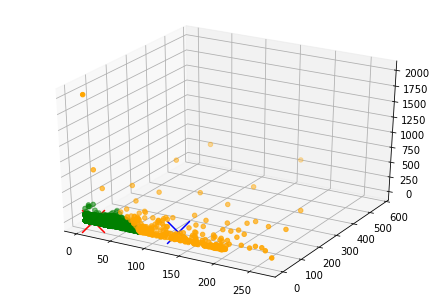

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=Axes3D(fig)

ax.scatter(df_clustering_second[df_clustering_second['Cluster_labels']==0]["Eml.Sent.Num"],
           df_clustering_second[df_clustering_second['Cluster_labels']==0]["Eml.Open.Num"],
           df_clustering_second[df_clustering_second['Cluster_labels']==0]["email_view_rate"],
           color='green')

ax.scatter(df_clustering_second[df_clustering_second['Cluster_labels']==1]["Eml.Sent.Num"],
           df_clustering_second[df_clustering_second['Cluster_labels']==1]["Eml.Open.Num"],
           df_clustering_second[df_clustering_second['Cluster_labels']==1]["email_view_rate"],
           color='orange')

ax.scatter(km.cluster_centers_[0,0],km.cluster_centers_[0,1],km.cluster_centers_[0,2],color='red',marker='x',s=520)
ax.scatter(km.cluster_centers_[1,0],km.cluster_centers_[1,1],km.cluster_centers_[1,2],color='blue',marker='x',s=520)

plt.show()

## Conclusion

1) We can clearly observe that the first clustering table gives a better visualization of the clusters compared to the second table

2) OOBWIN15 source should be kept under priority always as most number of customers can be acquired from here.

3) Customers with Opted-in status are high in number which is good sign but to convert email opt-ins to purchase conversions, potential customer segments are needed to be kept under the priority radar.

4) Further more , potential customers belonging to different segments should be analysed thoroughly and should be given value under the database.

5) Competitor’s target customer should be identified and strategies should be planned.

6) Moreover, those customers should also be targeted those are getting the least attention and their purchase history should be studied in order to attract them towards those products in which they have interest.